In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [145]:
df = pd.read_csv('train.csv')
df.shape

(891, 12)

In [127]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C


In [146]:
df = df.drop(['PassengerId','Cabin','Name','Ticket','Embarked'], axis=1)

Survival Count by Passenger Class:
        Dead  Survived
Pclass                
1         80       136
2         97        87
3        372       119



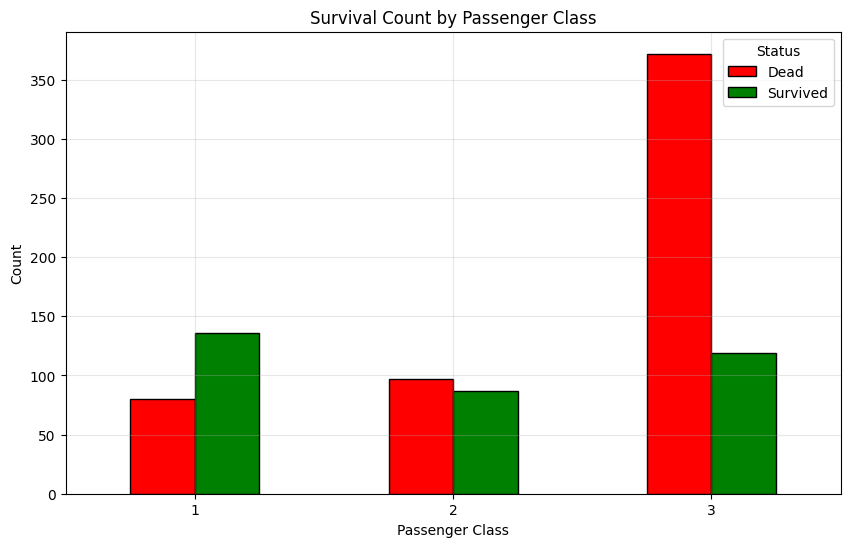

In [130]:
# Count survivors and deaths by passenger class
survival_by_pclass = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
survival_by_pclass.columns = ['Dead', 'Survived']
print("Survival Count by Passenger Class:")
print(survival_by_pclass)
print()

# Visualize the results
survival_by_pclass.plot(kind='bar', figsize=(10, 6), color=['red', 'green'], edgecolor='black')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

Survival Count by Gender:
        Dead  Survived
Sex                   
female    81       233
male     468       109



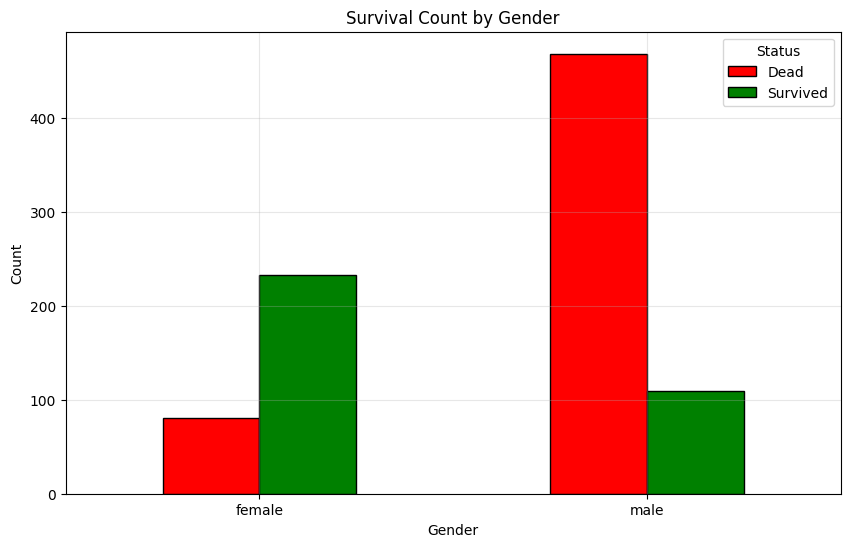

In [136]:
# Count survivors and deaths by gender
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
survival_by_sex.columns = ['Dead', 'Survived']
print("Survival Count by Gender:")
print(survival_by_sex)
print()

# Visualize the results
survival_by_sex.plot(kind='bar', figsize=(10, 6), color=['red', 'green'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

Survival Count by Parch (Parents/Children):
       Dead  Survived
Parch                
0       445       233
1        53        65
2        40        40
3         2         3
4         4         0
5         4         1
6         1         0



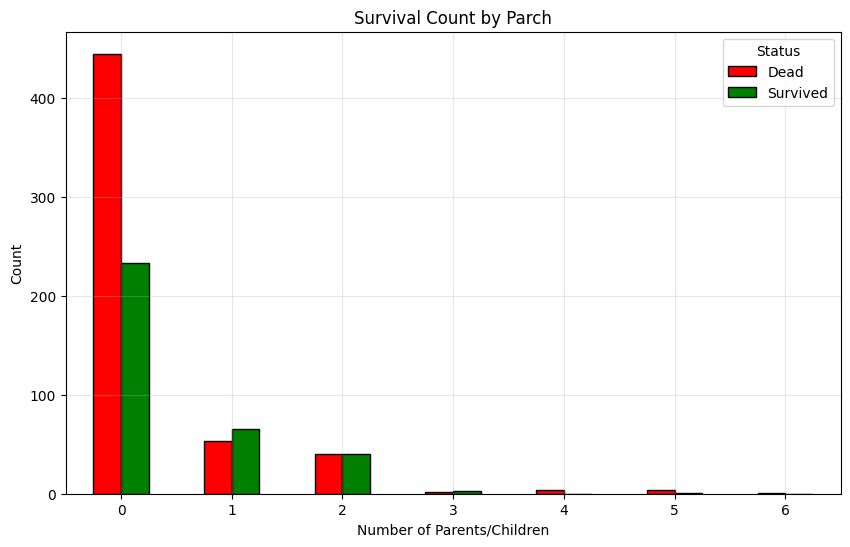

In [137]:
# Count survivors and deaths by Parch (parents/children)
survival_by_parch = df.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
survival_by_parch.columns = ['Dead', 'Survived']
print("Survival Count by Parch (Parents/Children):")
print(survival_by_parch)
print()

# Visualize the results
survival_by_parch.plot(kind='bar', figsize=(10, 6), color=['red', 'green'], edgecolor='black')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.title('Survival Count by Parch')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

Survival Count by SibSp (Siblings/Spouses):
       Dead  Survived
SibSp                
0       398       210
1        97       112
2        15        13
3        12         4
4        15         3
5         5         0
8         7         0



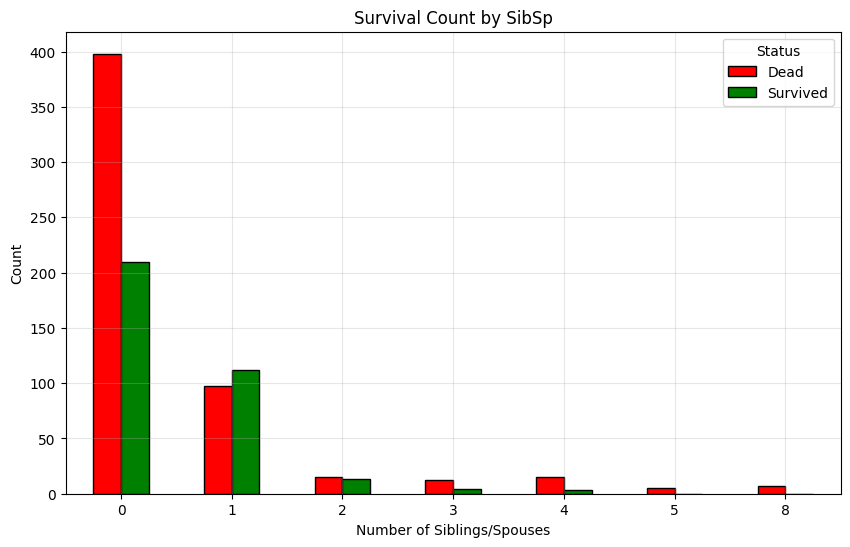

In [138]:
# Count survivors and deaths by SibSp (siblings/spouses)
survival_by_sibsp = df.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
survival_by_sibsp.columns = ['Dead', 'Survived']
print("Survival Count by SibSp (Siblings/Spouses):")
print(survival_by_sibsp)
print()

# Visualize the results
survival_by_sibsp.plot(kind='bar', figsize=(10, 6), color=['red', 'green'], edgecolor='black')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.title('Survival Count by SibSp')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

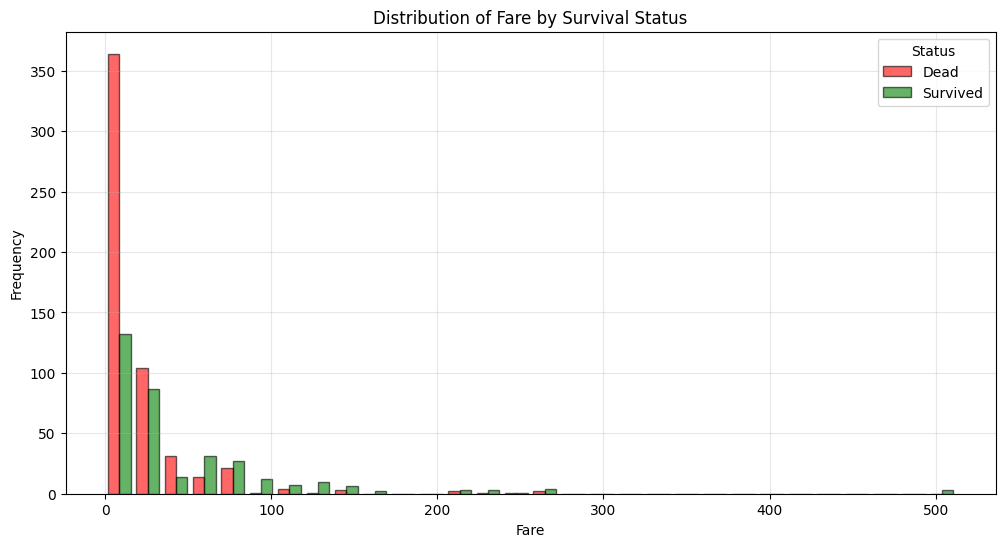

Fare Statistics by Survival Status:

Dead - Mean Fare: $22.12, Median: $10.50
Survived - Mean Fare: $48.40, Median: $26.00


In [139]:
# Histogram of Fare by Survival Status
plt.figure(figsize=(12, 6))

# Create histogram for survived and not survived
survived_fares = df[df['Survived'] == 1]['Fare']
dead_fares = df[df['Survived'] == 0]['Fare']

plt.hist([dead_fares, survived_fares], bins=30, label=['Dead', 'Survived'], 
         color=['red', 'green'], alpha=0.6, edgecolor='black')

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival Status')
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

# Summary statistics
print("Fare Statistics by Survival Status:")
print("=" * 50)
print(f"\nDead - Mean Fare: ${dead_fares.mean():.2f}, Median: ${dead_fares.median():.2f}")
print(f"Survived - Mean Fare: ${survived_fares.mean():.2f}, Median: ${survived_fares.median():.2f}")

In [140]:
# Fill the age based on their gender age (using median)
print("Missing Age values before imputation:")
print(f"Total missing: {df['Age'].isnull().sum()}")
print()

# Calculate median age by gender
median_age_by_gender = df.groupby('Sex')['Age'].median()
print("Median Age by Gender:")
print(median_age_by_gender)
print()

# Fill missing ages based on gender
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))

print("\nMissing Age values after imputation:")
print(f"Total missing: {df['Age'].isnull().sum()}")
print("\nAge imputation completed successfully!")

Missing Age values before imputation:
Total missing: 177

Median Age by Gender:
Sex
female    27.0
male      29.0
Name: Age, dtype: float64


Missing Age values after imputation:
Total missing: 0

Age imputation completed successfully!


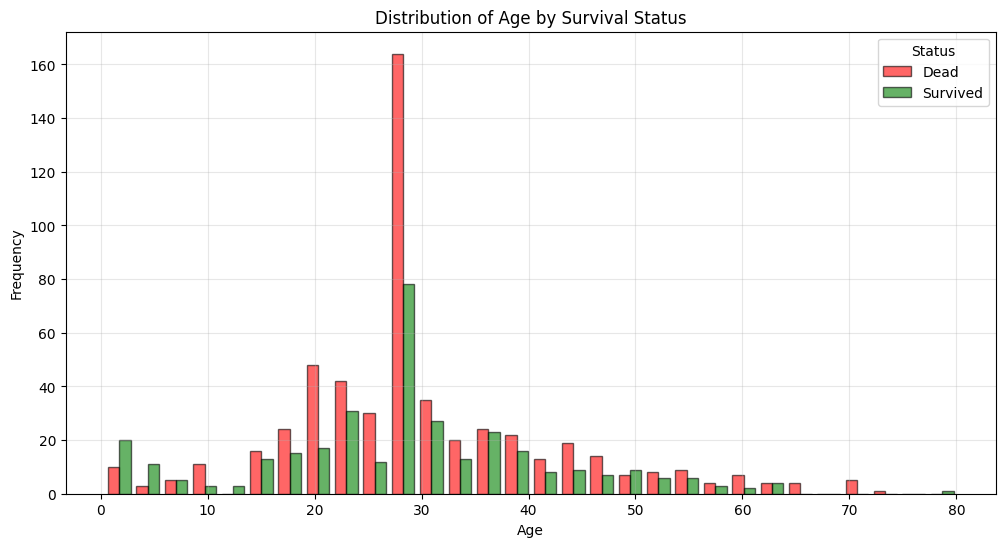

Age Statistics by Survival Status:

Dead - Mean Age: 30.19, Median: 29.00
Survived - Mean Age: 28.23, Median: 27.00


In [141]:
# Histogram of Age by Survival Status
plt.figure(figsize=(12, 6))

# Create histogram for survived and not survived
survived_ages = df[df['Survived'] == 1]['Age']
dead_ages = df[df['Survived'] == 0]['Age']

plt.hist([dead_ages, survived_ages], bins=30, label=['Dead', 'Survived'], 
         color=['red', 'green'], alpha=0.6, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival Status')
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

# Summary statistics
print("Age Statistics by Survival Status:")
print("=" * 50)
print(f"\nDead - Mean Age: {dead_ages.mean():.2f}, Median: {dead_ages.median():.2f}")
print(f"Survived - Mean Age: {survived_ages.mean():.2f}, Median: {survived_ages.median():.2f}")

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


Training and Evaluating Models:

Logistic Regression:
Accuracy: 0.8101 (81.01%)

Classification Report:
              precision    recall  f1-score   support

        Dead       0.81      0.88      0.84       105
    Survived       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

------------------------------------------------------------

Decision Tree:
Accuracy: 0.7542 (75.42%)

Classification Report:
              precision    recall  f1-score   support

        Dead       0.79      0.79      0.79       105
    Survived       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179

------------------------------------------------------------

Random Forest:
Accuracy: 0.7989 (79.89%)

Classificat

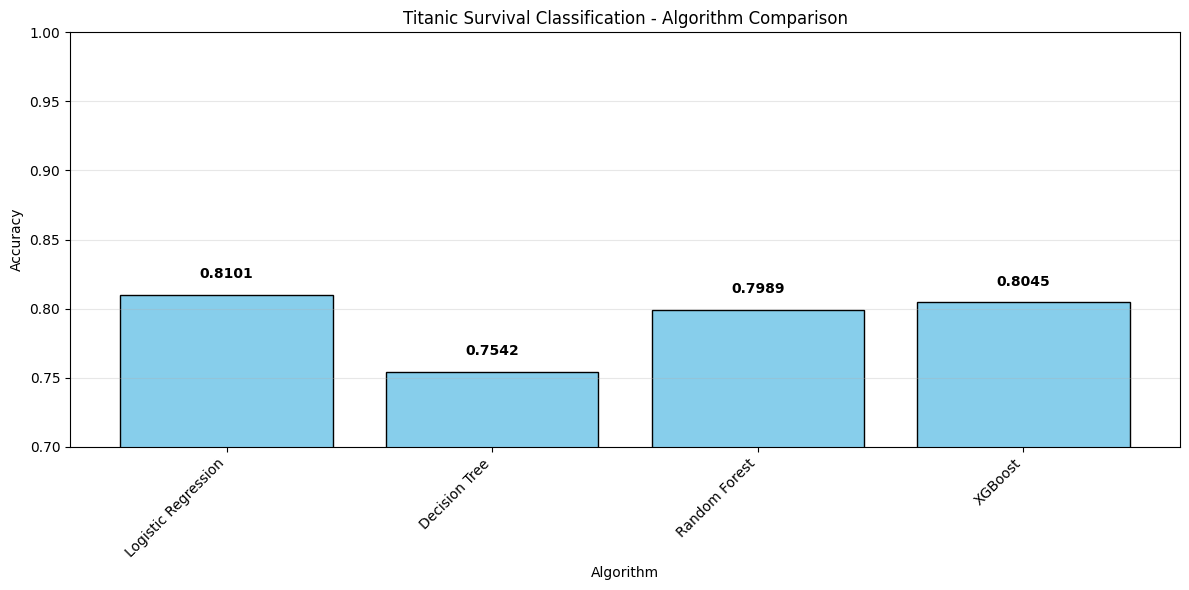


Best Model: Logistic Regression with accuracy 0.8101


In [156]:
# Train multiple classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}
print("Training and Evaluating Models:")
print("=" * 60)

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Dead', 'Survived']))
    print("-" * 60)

# Visualize results
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='black')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Titanic Survival Classification - Algorithm Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)
plt.grid(True, alpha=0.3, axis='y')
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Display best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]:.4f}")

In [154]:
# Encode categorical variable (Sex)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())
print()

# Fill any remaining missing values in Age and Fare
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

print("After handling missing values:")
print(df.isnull().sum())
print()

# Prepare features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nFeatures: {list(X.columns)}")
print(f"Target: Survived")

Missing values in dataset:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

After handling missing values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Training set size: 712
Test set size: 179

Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Target: Survived


C:\Users\adity\AppData\Local\Temp\ipykernel_1988\1671990268.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_1988\1671990268.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [157]:
df2 = pd.read_csv('test.csv')
df2 = df2.drop(['PassengerId','Cabin','Name','Ticket','Embarked'], axis=1)

Test data info before preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass                418 non-null    int64  
 1   Sex                   0 non-null      float64
 2   Age                   418 non-null    float64
 3   SibSp                 418 non-null    int64  
 4   Parch                 418 non-null    int64  
 5   Fare                  418 non-null    float64
 6   Predicted_Survival    418 non-null    int64  
 7   Survival_Probability  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.3 KB
None

Missing values after preprocessing:
Pclass                    0
Sex                     418
Age                       0
SibSp                     0
Parch                     0
Fare                      0
Predicted_Survival        0
Survival_Probability      0
dtype: int64

Missing values in 

C:\Users\adity\AppData\Local\Temp\ipykernel_1988\2262102557.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(age_median, inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_1988\2262102557.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

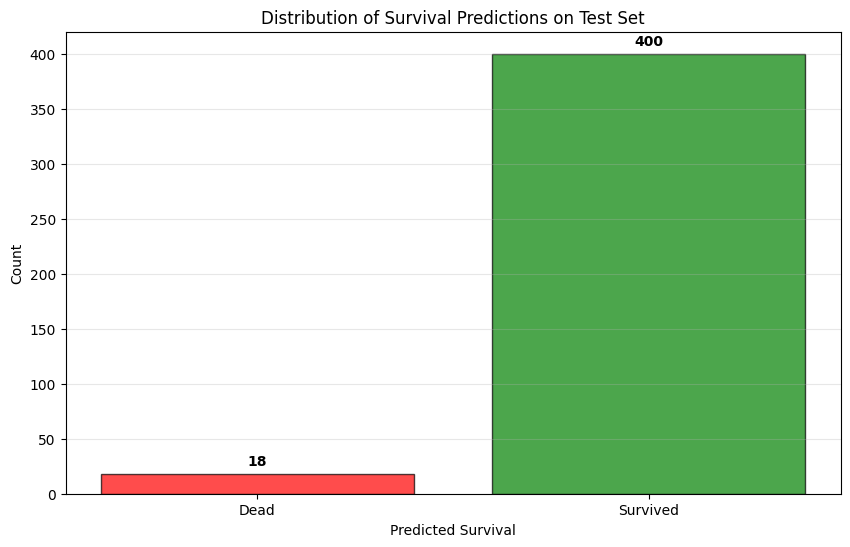

In [163]:
# Preprocess test data (df2) the same way as training data
print("Test data info before preprocessing:")
print(df2.info())
print()

# Encode Sex column - using manual mapping to match training data
# female -> 0, male -> 1
df2['Sex'] = df2['Sex'].map({'female': 0, 'male': 1})

# Calculate overall medians first
age_median = df2['Age'].median()
fare_median = df2['Fare'].median()

# If medians are NaN, use training data medians
if pd.isna(age_median):
    age_median = 28.0  # approximate median age
if pd.isna(fare_median):
    fare_median = 14.5  # approximate median fare

# Fill missing values
df2['Age'].fillna(age_median, inplace=True)
df2['Fare'].fillna(fare_median, inplace=True)

print("Missing values after preprocessing:")
print(df2.isnull().sum())
print()

# Prepare features (same columns as training)
X_test_df2 = df2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

# Aggressive NaN handling - replace any NaN with 0 as last resort
X_test_df2 = X_test_df2.fillna(0)

# Verify no missing values in features
print("Missing values in features:")
print(X_test_df2.isnull().sum())
print(f"Any NaN values remaining: {X_test_df2.isnull().any().any()}")
print()

# Get the trained Logistic Regression model
lr_model = classifiers['Logistic Regression']

# Make predictions
predictions = lr_model.predict(X_test_df2)
predictions_proba = lr_model.predict_proba(X_test_df2)

# Add predictions to dataframe
df2['Predicted_Survival'] = predictions
df2['Survival_Probability'] = predictions_proba[:, 1]

# Display results
print("Prediction Summary:")
print("=" * 50)
print(f"Total passengers: {len(predictions)}")
print(f"Predicted Dead: {(predictions == 0).sum()}")
print(f"Predicted Survived: {(predictions == 1).sum()}")
print(f"Survival Rate: {(predictions == 1).sum() / len(predictions) * 100:.2f}%")
print()

# Show sample predictions
print("\nSample Predictions:")
print(df2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Predicted_Survival', 'Survival_Probability']].head(10))

# Visualize predictions
plt.figure(figsize=(10, 6))
counts = [((predictions == 0).sum()), ((predictions == 1).sum())]
colors = ['red', 'green']
plt.bar(['Dead', 'Survived'], counts, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Survival')
plt.ylabel('Count')
plt.title('Distribution of Survival Predictions on Test Set')
plt.grid(True, alpha=0.3, axis='y')
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')
plt.show()

In [164]:
# Check if test.csv has 'Survived' column to calculate accuracy
test_df = pd.read_csv('test.csv')
print("Columns in test.csv:")
print(test_df.columns.tolist())
print()

if 'Survived' in test_df.columns:
    print("test.csv HAS the Survived column - calculating accuracy...")
    # Load and preprocess
    test_actual = pd.read_csv('test.csv')
    y_true = test_actual['Survived']
    
    # Get predictions (already calculated in previous cell)
    test_accuracy = accuracy_score(y_true, predictions)
    print(f"\nAccuracy on test.csv: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
else:
    print("test.csv DOES NOT have the Survived column (standard Kaggle format)")
    print("Cannot calculate accuracy without ground truth labels.")
    print()
    print("=" * 60)
    print("VALIDATION SET ACCURACIES (from 20% split of train.csv):")
    print("=" * 60)
    for model_name, acc in results.items():
        print(f"{model_name}: {acc:.4f} ({acc*100:.2f}%)")


Columns in test.csv:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

test.csv DOES NOT have the Survived column (standard Kaggle format)
Cannot calculate accuracy without ground truth labels.

VALIDATION SET ACCURACIES (from 20% split of train.csv):
Logistic Regression: 0.8101 (81.01%)
Decision Tree: 0.7542 (75.42%)
Random Forest: 0.7989 (79.89%)
XGBoost: 0.8045 (80.45%)
